In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("Corona_NLP_train.csv",  encoding='latin-1')

In [5]:
df.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
5788,9587,54539,"Accra, Ghana",19-03-2020,@OforiAkuffo The supermarket staff did better ...,Positive
14401,18200,63152,"New Delhi, India",21-03-2020,@irvpaswan @drharshvardhan @narendramodi @Flip...,Extremely Positive
19399,23198,68150,"Syracuse, New York",24-03-2020,Tomorrow I am going to the grocery store to bu...,Extremely Negative
16077,19876,64828,"Dartmouth, Nova Scotia, Canada",22-03-2020,Just in! #n95mask at 2.88 usd! I have access t...,Neutral
13355,17154,62106,"Maine, USA",21-03-2020,@ShelleyElwood @JuanchoS Food prices have gone...,Extremely Positive


In [6]:
df.drop(columns = ["UserName",	"ScreenName",	"Location",	"TweetAt"] , inplace = True)

In [7]:
df.sample(5)

,OriginalTweet,Sentiment
21122,Brewer Mag Test Kitchen Blog: We continue prod...,Neutral
16680,PSA: Breweries without distillation licensing ...,Neutral
27915,'A perfect storm': US facing hunger crisis as ...,Negative
37608,I stopped watching the #Coronavirus White Hou...,Extremely Negative
18155,People in #Tucson are apparently desperate for...,Negative


In [8]:
df.iloc[39164]

OriginalTweet    COVID-19Â \r\r\n\r\r\nBy Maria Sicily Guido, 2...
Sentiment                                                 Positive
Name: 39164, dtype: object


# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy
```
# This is formatted as code
```





In [9]:
#Data cleaning
df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [12]:
df.Sentiment.isnull().sum()

0

In [13]:
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [14]:
df["Sentiment"] = df["Sentiment"].map({"Extremely Negative" : 0 , "Negative" : 1 , "Neutral" : 2 , "Positive" : 3 , "Extremely Positive" : 4})

In [15]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#df['Sentiment'] = encoder.fit_transform(df['Sentiment'])
# ex. neg = 0 , ex. positive = 1 , neg = 2 , neutral = 3 , positive = 4

In [16]:
df.Sentiment.sample(5)

19756    1
5999     1
10261    3
25455    3
40035    3
Name: Sentiment, dtype: int64

In [17]:
df.shape

(41157, 2)

In [18]:
#2.EDA
df.Sentiment.value_counts() # data is a bit imbalance

3    11422
1     9917
2     7713
4     6624
0     5481
Name: Sentiment, dtype: int64

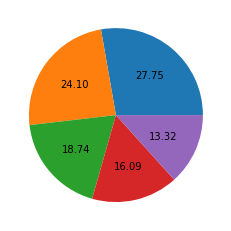

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['Sentiment'].value_counts(),autopct="%0.2f")
plt.show()

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#creating a new feature
# length of tweet
df['num_characters'] = df['OriginalTweet'].apply(len)
#char in tweet
df['num_words'] = df['OriginalTweet'].apply(lambda x:len(nltk.word_tokenize(x)))
#number of sentence 
df['num_sentences'] = df['OriginalTweet'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [22]:
df.sample(5)

,OriginalTweet,Sentiment,num_characters,num_words,num_sentences
4528,Sir Mark Walport says the government has been ...,2,143,25,2
35255,YPBMF #stayathome challenge video 3. great wor...,4,301,49,2
17093,You know how everyone went and stripped the sh...,1,280,54,4
25216,#Kuwait will announce measures to shore up the...,3,250,41,2
39136,If regardless of their legal status stopped sh...,0,207,33,1


In [23]:
# now the point is to see relation between new created features
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,41157.000000,41157.000000,41157.000000
mean,204.200160,37.333771,2.266856
std,68.655129,14.045967,1.605267
min,11.000000,1.000000,1.000000
25%,151.000000,27.000000,1.000000
50%,215.000000,39.000000,2.000000
75%,259.000000,48.000000,3.000000
max,355.000000,235.000000,57.000000


In [24]:
df[df['Sentiment'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5481.000000,5481.000000,5481.000000
mean,221.479839,40.970626,2.406678
std,59.985132,12.431361,1.538349
min,14.000000,2.000000,1.000000
25%,181.000000,32.000000,1.000000
50%,237.000000,43.000000,2.000000
75%,271.000000,50.000000,3.000000
max,355.000000,87.000000,20.000000


In [25]:
df[df['Sentiment'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9917.000000,9917.000000,9917.000000
mean,203.334174,37.133911,2.215489
std,67.117114,13.493138,1.421203
min,18.000000,3.000000,1.000000
25%,151.000000,27.000000,1.000000
50%,212.000000,38.000000,2.000000
75%,257.000000,48.000000,3.000000
max,331.000000,158.000000,26.000000


In [26]:
df[df['Sentiment'] == 2][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7713.000000,7713.000000,7713.000000
mean,168.160897,30.335278,2.001685
std,72.648841,15.689227,2.071998
min,11.000000,1.000000,1.000000
25%,109.000000,19.000000,1.000000
50%,160.000000,28.000000,2.000000
75%,229.000000,41.000000,2.000000
max,325.000000,235.000000,57.000000


In [27]:
df[df['Sentiment'] == 3][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,11422.000000,11422.000000,11422.000000
mean,207.056558,37.719314,2.258361
std,66.651587,13.282363,1.375119
min,11.000000,3.000000,1.000000
25%,156.000000,28.000000,1.000000
50%,218.000000,39.000000,2.000000
75%,259.000000,48.000000,3.000000
max,350.000000,173.000000,16.000000


In [28]:
df[df['Sentiment'] == 4][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6624.000000,6624.000000,6624.000000
mean,228.237470,42.107941,2.551479
std,58.390527,11.981892,1.608638
min,19.000000,3.000000,1.000000
25%,192.000000,34.000000,1.000000
50%,241.000000,43.000000,2.000000
75%,275.000000,51.000000,3.000000
max,338.000000,142.000000,27.000000


In [29]:
import seaborn as sns

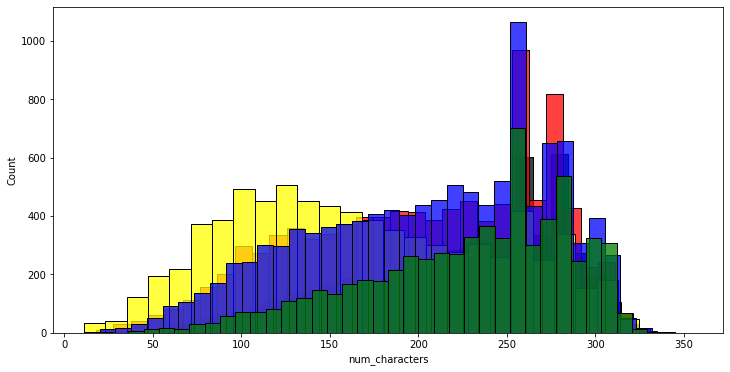

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Sentiment'] == 0]['num_characters'] , color='black')
sns.histplot(df[df['Sentiment'] == 1]['num_characters'],color='red')
sns.histplot(df[df['Sentiment'] == 2]['num_characters'],color='yellow')
sns.histplot(df[df['Sentiment'] == 3]['num_characters'],color='blue')
sns.histplot(df[df['Sentiment'] == 4]['num_characters'],color='green')

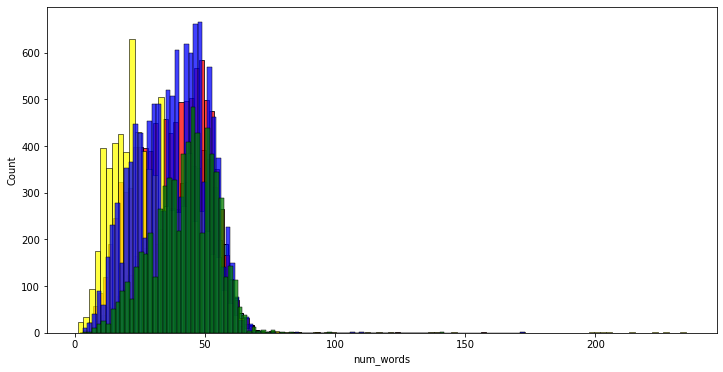

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Sentiment'] == 0]['num_words'])
sns.histplot(df[df['Sentiment'] == 1]['num_words'],color='red')
sns.histplot(df[df['Sentiment'] == 2]['num_words'],color='yellow')
sns.histplot(df[df['Sentiment'] == 3]['num_words'],color='blue')
sns.histplot(df[df['Sentiment'] == 4]['num_words'],color='green')

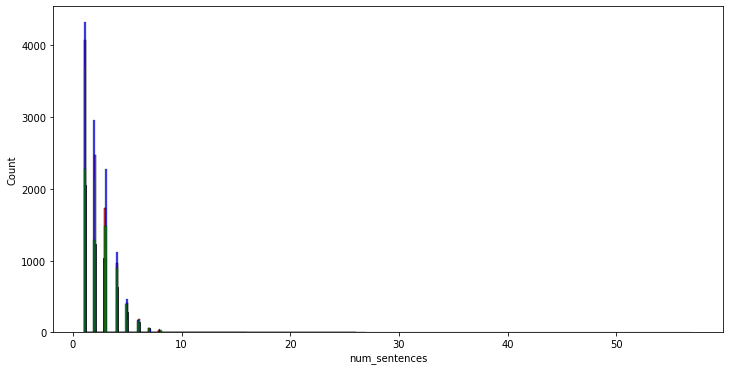

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Sentiment'] == 0]['num_sentences'])
sns.histplot(df[df['Sentiment'] == 1]['num_sentences'],color='red')
sns.histplot(df[df['Sentiment'] == 2]['num_sentences'],color='yellow')
sns.histplot(df[df['Sentiment'] == 3]['num_sentences'],color='blue')
sns.histplot(df[df['Sentiment'] == 4]['num_sentences'],color='green')

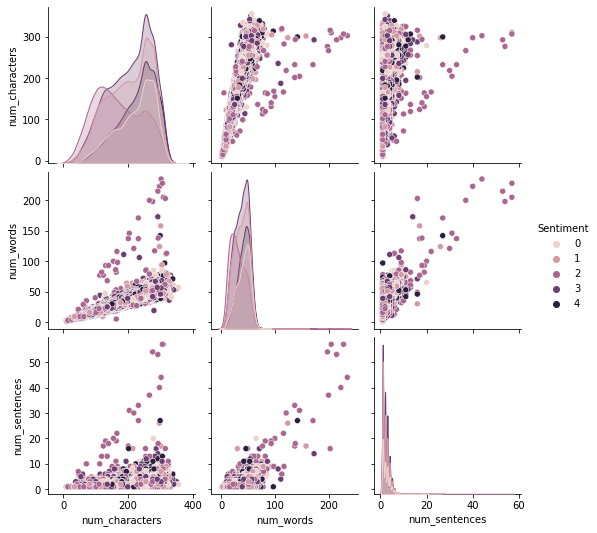

In [33]:
sns.pairplot(df,hue='Sentiment')

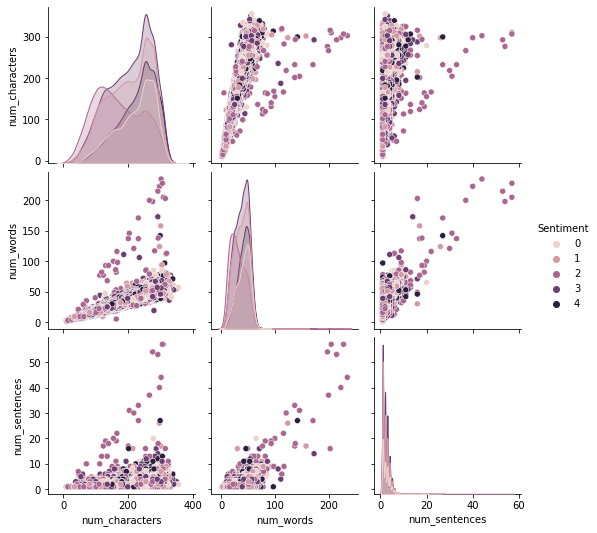

In [34]:
sns.pairplot(df,hue='Sentiment')

In [35]:
#3.Data Preprocessing
  # Lower case
  # Tokenization
  # Removing special characters
  # Removing stop words and punctuation
  # Stemming

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# Function for removing HTML , URLS , Punctuations
import re
import string
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)
def remove_punc(text):
    exclude = string.punctuation
    for char in exclude:
        text = text.replace(char,'')
    return text

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    y = []
    for i in text:
        if i.isalnum(): #sice i dont want any special char in my data
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [39]:
df['transformed_text'] = df['OriginalTweet'].apply(remove_html_tags) #it step will take time

In [40]:
df['transformed_text'] = df['transformed_text'].apply(remove_url) #it step will take time

In [41]:
df['transformed_text'] = df['transformed_text'].apply(transform_text) #it step will take time

In [42]:
#Word Cloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
target1 = wc.generate(df[df['Sentiment'] == 1]['transformed_text'].str.cat(sep=" "))

In [44]:
target0 = wc.generate(df[df['Sentiment'] == 0]['transformed_text'].str.cat(sep=" "))

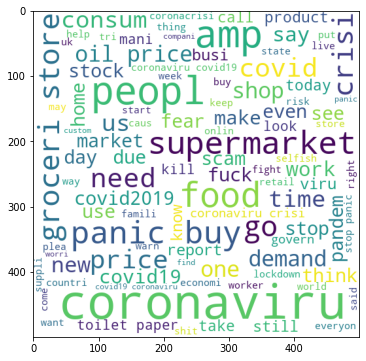

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(target1) #plt.imshow(target0)

In [46]:
df.sample(5)

,OriginalTweet,Sentiment,num_characters,num_words,num_sentences,transformed_text
26091,Wish the government would give some kind of ex...,3,151,28,3,wish govern would give kind extra cash groceri...
27257,You know what s disgusting All these grocery s...,0,246,44,1,know disgust groceri store rais price milk egg...
35039,Supermarket bosses are understood to have been...,1,216,33,1,supermarket boss understood negoti stormont ex...
11326,Overheard in the supermarket before ..my other...,1,173,41,2,overheard supermarket half sainsburi daughter ...
35930,Interesting read about the consumer trend duri...,4,186,38,3,interest read consum trend pandem half 58 agre...


In [47]:
#some exrta work for presenting
Expositive_corpus = []
for msg in df[df['Sentiment'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        Expositive_corpus.append(word)

len(Expositive_corpus)        

174917

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


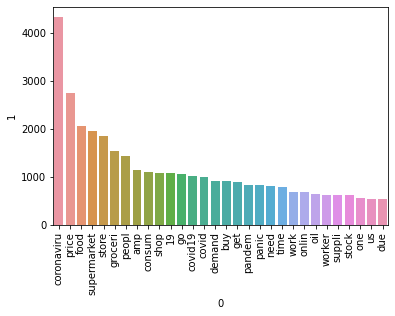

In [48]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Expositive_corpus).most_common(30))[0],pd.DataFrame(Counter(Expositive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


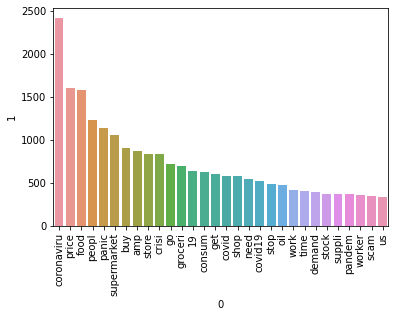

In [49]:
Exnegtive_corpus = []
for msg in df[df['Sentiment'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        Exnegtive_corpus.append(word)
#len(ham_corpus)
from collections import Counter
sns.barplot(pd.DataFrame(Counter(Exnegtive_corpus).most_common(30))[0],pd.DataFrame(Counter(Exnegtive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
# Text Vectorization
# using Bag of Words
df.head()

,OriginalTweet,Sentiment,num_characters,num_words,num_sentences,transformed_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2,111,17,1,menyrbi chrisitv
1,advice Talk to your neighbours family to excha...,3,237,38,1,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,3,131,18,1,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,3,306,58,4,food stock one empti pleas panic enough food e...
4,"Me, ready to go at supermarket during the #COV...",0,310,58,4,readi go supermarket covid19 outbreak paranoid...


In [51]:
#Modling

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() #use to apply Bag of words
tfidf = TfidfVectorizer(max_features=3000) #TF-IDF

In [53]:
X_cv = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
#apply scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_tfidf = scaler.fit_transform(X_tfidf)
X_cv = scaler.fit_transform(X_cv)


In [56]:
# for text vectorization we can use "Word2Vec"
import gensim
import gensim.downloader as gensim_api

In [57]:
#load model-- it will download the model
#gen = gensim_api.load("word2vec-google-news-300")

In [58]:
## fit w2v
gen = gensim.models.word2vec.Word2Vec(df['transformed_text'], size=300,   
            window=8, min_count=1, sg=1, iter=30)

KeyboardInterrupt: ignored

In [59]:
print(X_cv.shape)
print(X_tfidf.shape)
#print (gen.shape)

(41157, 3000)
(41157, 3000)


In [60]:
y = df['Sentiment'].values

In [61]:
y

array([2, 3, 3, ..., 3, 2, 1])

Model Tranning

In [62]:
#Using TF-IDF , X_tfidf

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.2,random_state=2)
X_traincv,X_testcv,y_traincv,y_testcv = train_test_split(X_tfidf,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
rf = RandomForestClassifier()

In [65]:
#model 1
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
#print(precision_score(y_test,y_pred1 , average = "weighted"))
#model 2
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
#print(precision_score(y_test,y_pred2))
#model 3
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
#print(precision_score(y_test,y_pred3))
#model 4
rf.fit(X_train,y_train)
y_pred3 = rf.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.33770651117589895
[[ 713   77  198   19   69]
 [ 838  125  766   57  195]
 [ 205   24 1158   32  122]
 [ 517   88 1001  119  596]
 [ 209   28  339   72  665]]
0.4771622934888241
[[ 344  553   39  127   13]
 [ 158  969  227  571   56]
 [  22  270  751  465   33]
 [  46  429  255 1365  226]
 [   6   86   41  681  499]]
0.4998785228377065
[[ 537  376   71   72   20]
 [ 309  803  385  392   92]
 [  35  170 1108  189   39]
 [ 114  405  464  955  383]
 [  24   85   66  426  712]]
0.548226433430515
[[ 508  379   73  104   12]
 [ 216  935  326  454   50]
 [  20  143 1128  238   12]
 [  70  324  358 1333  236]
 [  15   64   58  567  609]]


In [66]:
 #model 1
gnb.fit(X_traincv,y_traincv)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
#print(precision_score(y_test,y_pred1 , average = "weighted"))
#model 2
mnb.fit(X_traincv,y_traincv)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
#print(precision_score(y_test,y_pred2))
#model 3
bnb.fit(X_traincv,y_traincv)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
#print(precision_score(y_test,y_pred3))
#model 4
rf.fit(X_traincv,y_traincv)
y_pred3 = rf.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.33770651117589895
[[ 713   77  198   19   69]
 [ 838  125  766   57  195]
 [ 205   24 1158   32  122]
 [ 517   88 1001  119  596]
 [ 209   28  339   72  665]]
0.4771622934888241
[[ 344  553   39  127   13]
 [ 158  969  227  571   56]
 [  22  270  751  465   33]
 [  46  429  255 1365  226]
 [   6   86   41  681  499]]
0.4998785228377065
[[ 537  376   71   72   20]
 [ 309  803  385  392   92]
 [  35  170 1108  189   39]
 [ 114  405  464  955  383]
 [  24   85   66  426  712]]
0.5476190476190477
[[ 508  379   69  107   13]
 [ 225  928  327  446   55]
 [  22  148 1126  235   10]
 [  70  330  345 1356  220]
 [  22   53   54  594  590]]


In [67]:
# Voting Classifier
mnb = MultinomialNB()
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('bn', bnb), ('mnb', mnb), ('rf', rf)],voting='soft')
voting.fit(X_train,y_train)
VotingClassifier(estimators=[('bn',BernoulliNB()),('mnb', MultinomialNB()),('rf',RandomForestClassifier())],voting='soft')
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
#print("Precision",precision_score(y_test,y_pred))

Accuracy 0.5448250728862973


In [ ]:
# Applying stacking
estimators=[('bn', bnb), ('mnb', mnb), ('rt', rf)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
#print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))